In [1]:
# repo interaction
import os
# data handling via tablular format
import pandas as pd
# mathematical operations
import numpy as np
import math
import itertools
from scipy.stats import pointbiserialr
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# scaling data method
from sklearn.preprocessing import RobustScaler
# encoding ordinal data
from sklearn.preprocessing import OrdinalEncoder
# feature selection
import statsmodels.api as sm

In [2]:
# getting the data from the csv file
df = pd.read_csv('../data/diabetes.csv')

# Data Overview:

In [3]:
print("Data information:")
df.info()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data types check:

In [4]:
# Data types check:
print("Data types:")
df.dtypes

Data types:


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Since the **outcome** is object, but it is the representation for the classes' label. We need to convert it to the object data type to inspect the pattern in the data.

In [5]:
# Convert Outcome column to string
df["Outcome"] = df["Outcome"].astype(str)

## Missing values check:

In [6]:
# Check for missing values
print("Missing values:")
df.isna().sum()

Missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data summarisation:

In [7]:
# data summarisation:
print("Data summary:")
df.describe()

Data summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# After converting to object, the describe method will not show the statistics for the Outcome column
df["Outcome"].describe()

count     768
unique      2
top         0
freq      500
Name: Outcome, dtype: object

From these statistical summary, so many attributes are having out of range data value.

So we use the capping method to make the out of range data back to the max values and min values.

### Inspecting out of range data:

In [9]:
# 1. Glucose [78.0, 210.0]
print(f"Glucose less than minimum data: {len(df[df["Glucose"] < 78.0])}")
print(f"Glucose more than maximum data: {len(df[df["Glucose"] > 210.0])}")

Glucose less than minimum data: 34
Glucose more than maximum data: 0


In [10]:
# 2. BloodPressure [60.0, 110.0]
print(f"BloodPressure less than minimum data: {len(df[df["BloodPressure"] < 60.0])}")
print(f"BloodPressure more than maximum data: {len(df[df["BloodPressure"] > 110.0])}")

BloodPressure less than minimum data: 121
BloodPressure more than maximum data: 2


In [11]:
# 3. SkinThickness [20.0, 50.0]
print(f"SkinThickness less than minimum data: {len(df[df["SkinThickness"] < 20.0])}")
print(f"SkinThickness more than maximum data: {len(df[df["SkinThickness"] > 50.0])}")

SkinThickness less than minimum data: 338
SkinThickness more than maximum data: 9


In [12]:
# 4. Insulin [15.0, 495.0]
print(f"Insulin less than minimum data: {len(df[df["Insulin"] < 15.0])}")
print(f"Insulin more than maximum data: {len(df[df["Insulin"] > 495.0])}")

Insulin less than minimum data: 375
Insulin more than maximum data: 9


In [13]:
# 5. BMI [18.5, 40.0]
print(f"BMI less than minimum data: {len(df[df["BMI"] < 18.5])}")
print(f"BMI more than maximum data: {len(df[df["BMI"] > 40.0])}")

BMI less than minimum data: 15
BMI more than maximum data: 96


In [14]:
# 6. DiabetesPedigreeFunction [0.1, 2.2]
print(f"BMI less than minimum data: {len(df[df["BMI"] < 0.1])}")
print(f"BMI more than maximum data: {len(df[df["BMI"] > 2.2])}")

BMI less than minimum data: 11
BMI more than maximum data: 757


**Applies the capping methods to solve this problem**

In [15]:
# based on researched and assumption:
# 1. Glucose [78.0, 210.0]
Glucose = [78.0, 210.0]
df.loc[df["Glucose"] < Glucose[0], "Glucose"] = Glucose[0]
df.loc[df["Glucose"] > Glucose[1], "Glucose"] = Glucose[1]
assert df["Glucose"].max() <= Glucose[1]
assert df["Glucose"].min() >= Glucose[0]

In [16]:
# 2. BloodPressure [60.0, 110.0]
BloodPressure = [60.0, 110.0]
df.loc[df["BloodPressure"] < BloodPressure[0], "BloodPressure"] = BloodPressure[0]
df.loc[df["BloodPressure"] > BloodPressure[1], "BloodPressure"] = BloodPressure[1]
assert df["BloodPressure"].max() <= BloodPressure[1]
assert df["BloodPressure"].min() >= BloodPressure[0]

In [17]:
# 3. SkinThickness [20.0, 50.0]
SkinThickness = [20.0, 50.0]
df.loc[df["SkinThickness"] < SkinThickness[0], "SkinThickness"] = SkinThickness[0]
df.loc[df["SkinThickness"] > SkinThickness[1], "SkinThickness"] = SkinThickness[1]
assert df["SkinThickness"].max() <= SkinThickness[1]
assert df["SkinThickness"].min() >= SkinThickness[0]

In [18]:
# 4. Insulin [15.0, 495.0]
Insulin = [15.0, 495.0]
df.loc[df["Insulin"] < Insulin[0], "Insulin"] = Insulin[0]
df.loc[df["Insulin"] > Insulin[1], "Insulin"] = Insulin[1]
assert df["Insulin"].max() <= Insulin[1]
assert df["Insulin"].min() >= Insulin[0]

In [19]:
# 5. BMI [18.5, 40.0]
BMI = [18.5, 40.0]
df.loc[df["BMI"] < BMI[0], "BMI"] = BMI[0]
df.loc[df["BMI"] > BMI[1], "BMI"] = BMI[1]
assert df["BMI"].max() <= BMI[1]
assert df["BMI"].min() >= BMI[0]

In [20]:
# 6. DiabetesPedigreeFunction [0.1, 2.2]
DiabetesPedigreeFunction = [0.1, 2.2]
df.loc[df["DiabetesPedigreeFunction"] < DiabetesPedigreeFunction[0], "DiabetesPedigreeFunction"] = DiabetesPedigreeFunction[0]
df.loc[df["DiabetesPedigreeFunction"] > DiabetesPedigreeFunction[1], "DiabetesPedigreeFunction"] = DiabetesPedigreeFunction[1]
assert df["DiabetesPedigreeFunction"].max() <= DiabetesPedigreeFunction[1]
assert df["DiabetesPedigreeFunction"].min() >= DiabetesPedigreeFunction[0]

# Descriptive data analysis:

## Data redundancies check (And solve by dropping them immediately):

In [21]:
def check_data_redundancy(data):
  duplication_rows = data[data.duplicated()]
  if not duplication_rows.empty:
    print("The duplications are found: \n")
    duplication_rows
    return data.drop_duplicates()
  else:
    print("No duplications.")
    return data

In [22]:
df = check_data_redundancy(df)

No duplications.


## Label inspection:

In [23]:
def class_imb_detection(label_column):
  label_counts = label_column.value_counts()
  label_percentages = label_column.value_counts(normalize=True)*100

  print("Frequency of each class:")
  print(label_counts)
  print("\nPercentage of each class:")
  print(label_percentages)

  if label_percentages.max() - label_percentages.min() > 20:
    print("\nThere is a class imblance.")
    return label_counts, label_percentages
  else:
    print("\nThere is no significant class imbalance.")
    return label_counts, label_percentages

In [24]:
label_counts, label_percentages = class_imb_detection(df["Outcome"])

Frequency of each class:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of each class:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

There is a class imblance.


In [25]:
def visualise_class_distribution(label_counts):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  label_counts.plot(kind='bar')
  plt.title('Class Distribution (Bar Plot)')
  plt.xlabel('Class')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
  plt.title('Class Distribution (Pie Chart)')
  plt.ylabel('')

  plt.tight_layout()
  plt.show()
  pass

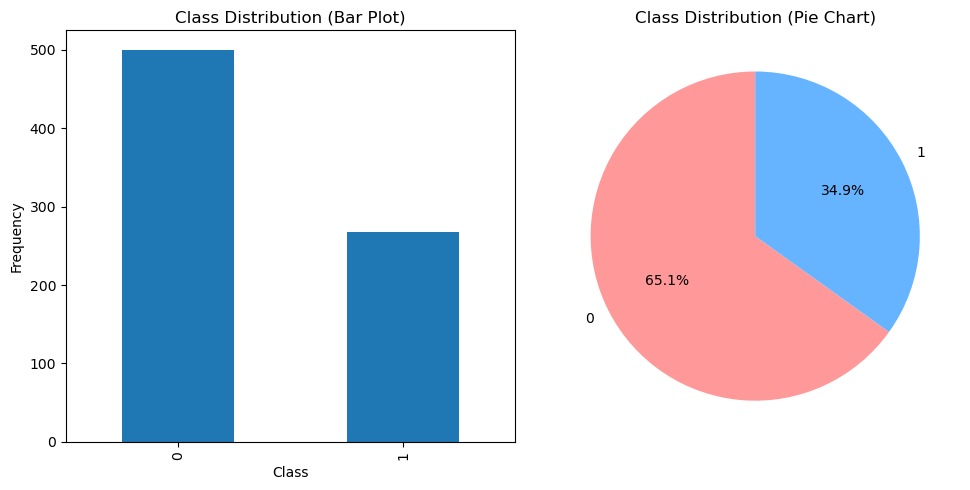

In [26]:
visualise_class_distribution(label_counts)

## Outliers' detection:

In [27]:
def outlier_dectection(x_df):
  """outlier detection using interquartile range

  Args:
      x_df (dataframe): x dimension

  Returns:
      dataframe: column name, and its outlier counts
  """
  outlier_counts = {}

  features = x_df.columns
  for feature in features:
    Q1 = x_df[feature].quantile(0.25)
    Q3 = x_df[feature].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - (1.5*IQR)
    UB = Q3 + (1.5*IQR)

    outliers = x_df[ (x_df[feature]<LB) | (x_df[feature]>UB) ]

    outlier_counts[feature] = len(outliers)
  outlier_counts = pd.DataFrame(list(outlier_counts.items()), columns=["feature", "outlier counted"])
  return outlier_counts

In [28]:
x_columns = [column for column in df.columns if column != "Outcome"]
outlier_counts = outlier_dectection(df[x_columns])
outlier_counts

,feature,outlier counted
0,Pregnancies,4
1,Glucose,0
2,BloodPressure,7
3,SkinThickness,0
4,Insulin,38
5,BMI,0
6,DiabetesPedigreeFunction,29
7,Age,9


We can negotiate with this load of outliers. So, leave them there.

## Data distribution:

In [29]:
def visualise_box_and_whisker_and_half_violin(x_df, y_df):
    columns = x_df.columns
    num_plots = len(columns)
    plots_per_row = 4

    num_rows = math.ceil(num_plots / plots_per_row)

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

    axes = axes.flatten()
    for i, column in enumerate(columns):
        ax = axes[i] if num_plots > 1 else axes

        sns.violinplot(x=y_df, y=x_df[column], ax=ax, inner=None, cut=0, split=True)

        sns.boxplot(x=y_df, y=x_df[column], ax=ax, width=0.2, color="black")

        ax.set_title(f"Box and Half-Violin plot for {column}")
        ax.set_xlabel("Outcome")
        ax.set_ylabel(column)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    pass

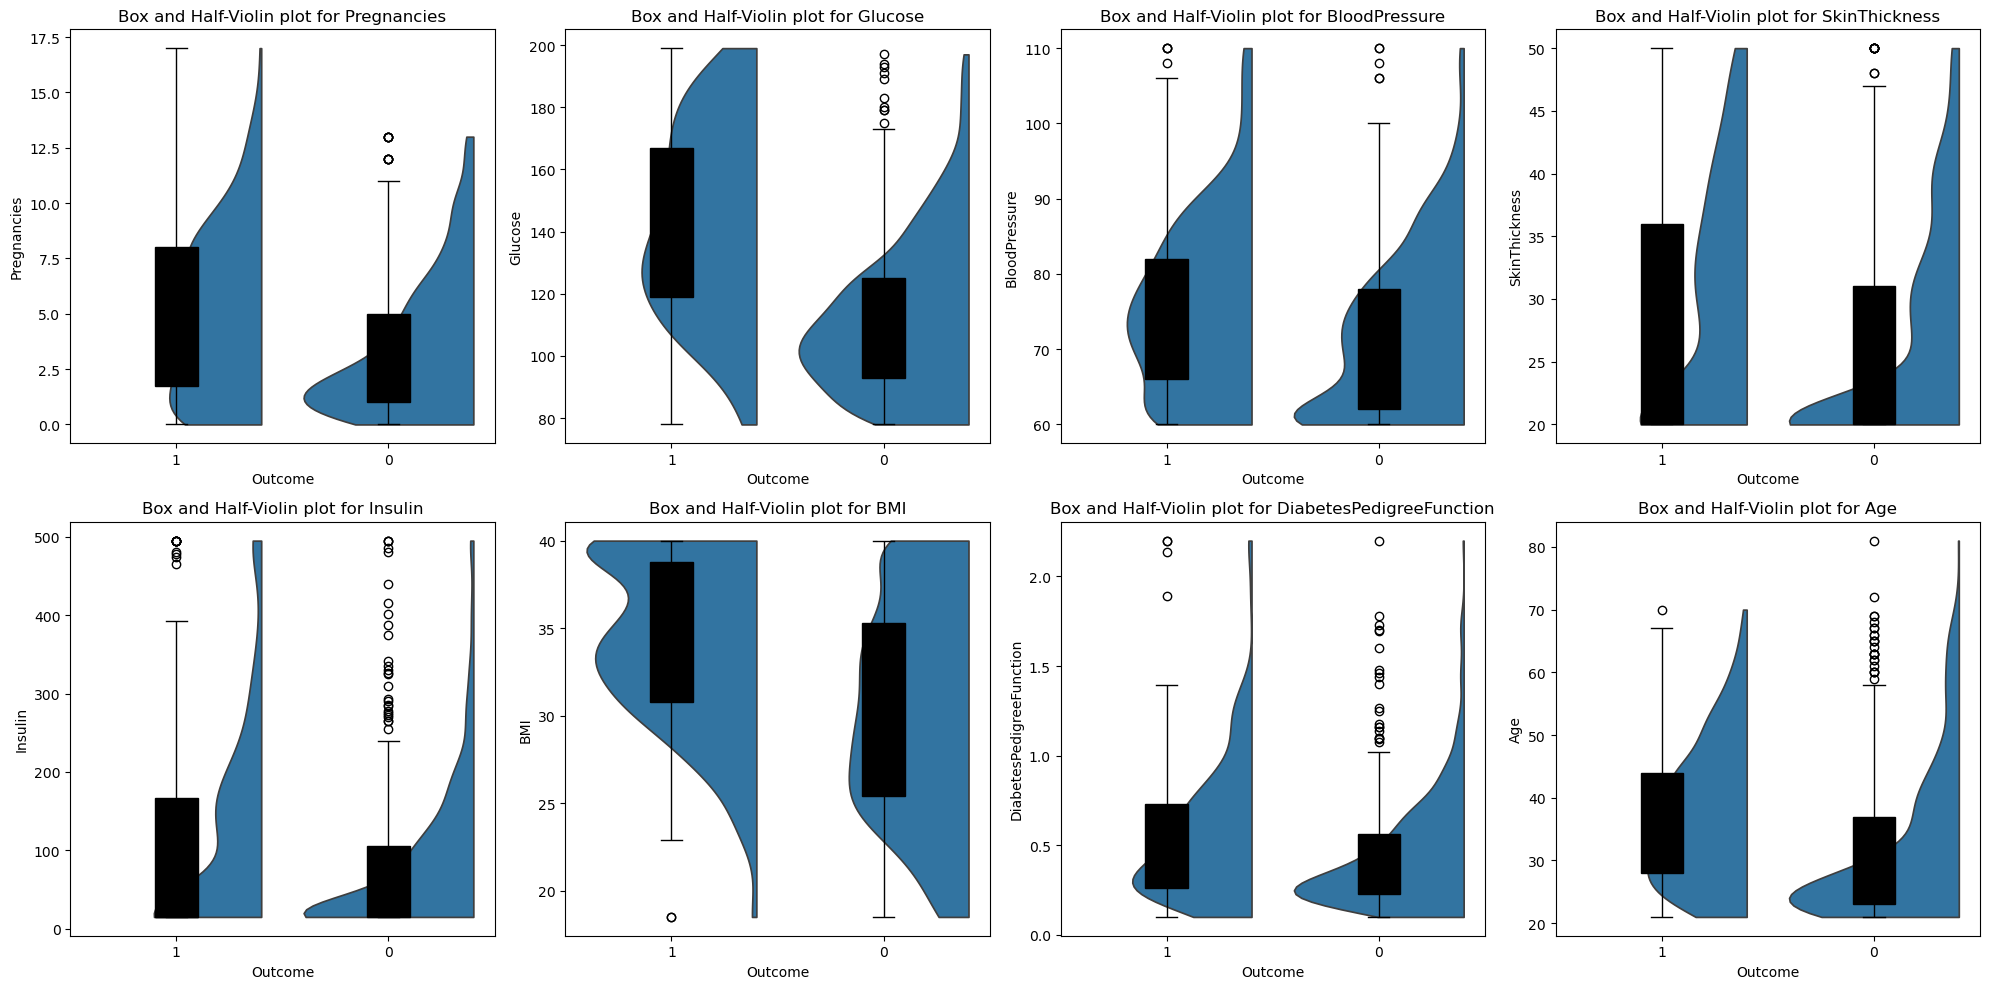

In [30]:
visualise_box_and_whisker_and_half_violin(df[x_columns], df["Outcome"])

In [31]:
def skewness_calculation(x_df):
  skewness_values = {}
  features = x_df.columns
  for feature in features:
    skewness_values[feature] = x_df[feature].skew()
  return skewness_values

def interpret_skewness(skewness_values):
    skewness_interpretation = {}
    for feature, skew in skewness_values.items():
        if skew > 1:
            skewness_interpretation[feature] = "Highly right-skewed"
        elif skew > 0.5:
            skewness_interpretation[feature] = "Moderately right-skewed"
        elif skew < -1:
            skewness_interpretation[feature] = "Highly left-skewed"
        elif skew < -0.5:
            skewness_interpretation[feature] = "Moderately left-skewed"
        else:
            skewness_interpretation[feature] = "Approximately symmetric"
    skewness_interpretation = pd.DataFrame(list(skewness_interpretation.items()), columns=["feature", "skewness"])
    return skewness_interpretation

In [32]:
skewness_values = skewness_calculation(df[x_columns])
skewness_interpretation = interpret_skewness(skewness_values)
skewness_interpretation

,feature,skewness
0,Pregnancies,Moderately right-skewed
1,Glucose,Moderately right-skewed
2,BloodPressure,Moderately right-skewed
3,SkinThickness,Moderately right-skewed
4,Insulin,Highly right-skewed
5,BMI,Approximately symmetric
6,DiabetesPedigreeFunction,Highly right-skewed
7,Age,Highly right-skewed


In [33]:
def visualise_scatter_plots(x_df, y_df):
    columns = x_df.columns
    feature_pairs = list(itertools.combinations(columns, 2))
    num_plots = len(feature_pairs)
    plots_per_row = 4

    num_rows = math.ceil(num_plots / plots_per_row)

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, (feature_x, feature_y) in enumerate(feature_pairs):
        sns.scatterplot(
            x=x_df[feature_x],
            y=x_df[feature_y],
            hue=y_df,
            ax=axes[i],
            alpha=0.6,
            s=10
        )
        axes[i].set_title(f"{feature_x} vs {feature_y}")
        axes[i].set_xlabel(feature_x)
        axes[i].set_ylabel(feature_y)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

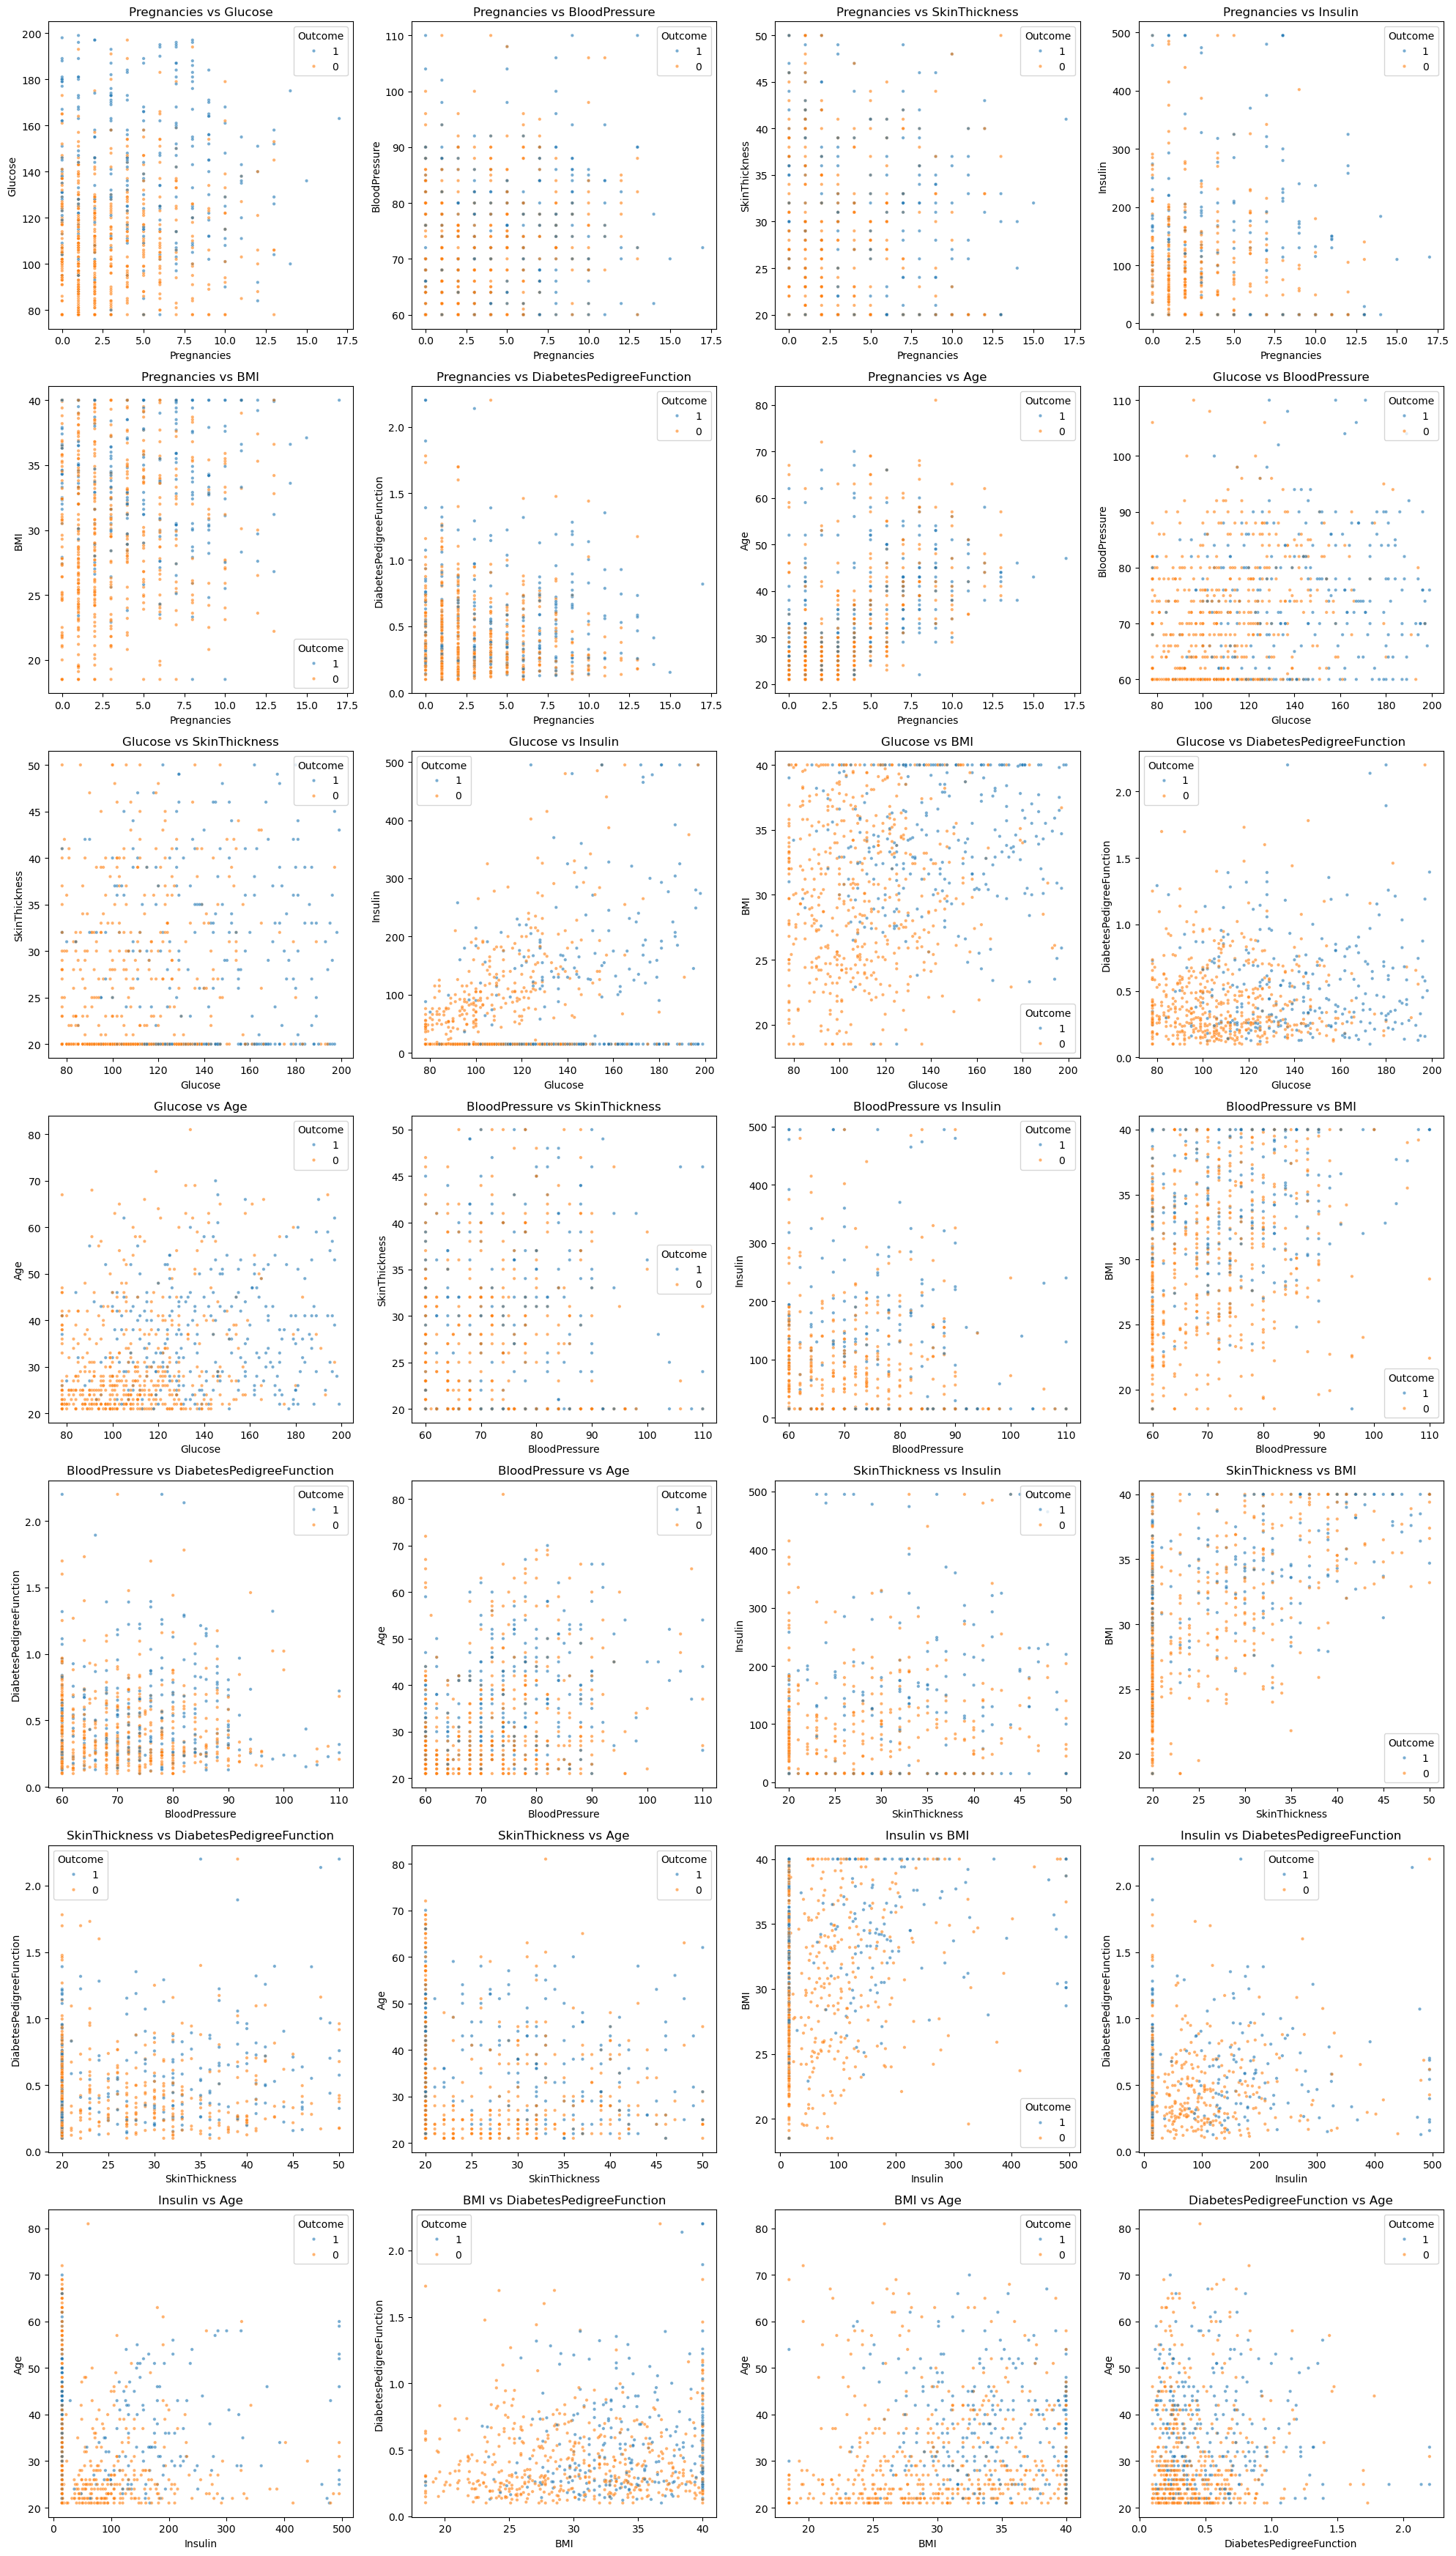

In [34]:
visualise_scatter_plots(df[x_columns], df["Outcome"])

## Inspecting the multi-collinearity:

In [35]:
def calc_covariance_mat(x_df):
    numerical_df = x_df.select_dtypes(include=['float64', 'int64'])
    return numerical_df.cov()

def visual_corr_heatmap(cov_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Covariance Matrix Heatmap")
    plt.show()

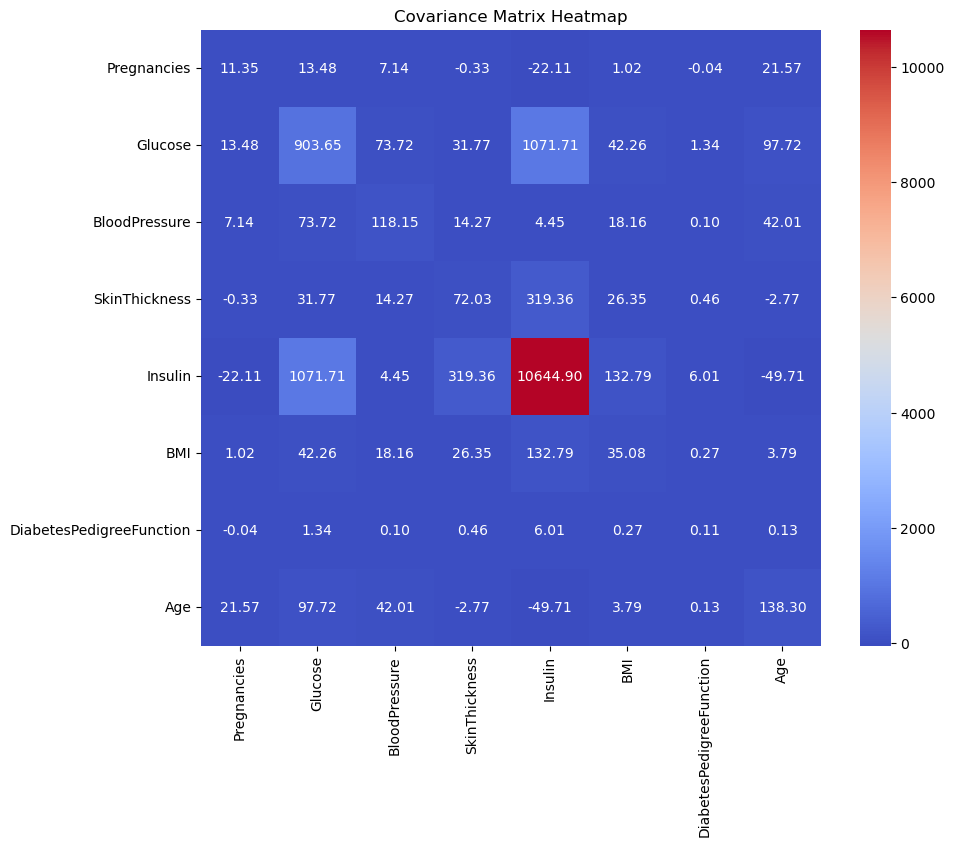

In [36]:
cov_matrix = calc_covariance_mat(df[x_columns])
visual_corr_heatmap(cov_matrix)

In [37]:
def calc_correlation_mat(x_df):
    numerical_df = x_df.select_dtypes(include=['float64', 'int64'])
    return numerical_df.corr()

def visual_corr_heatmap(corr_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

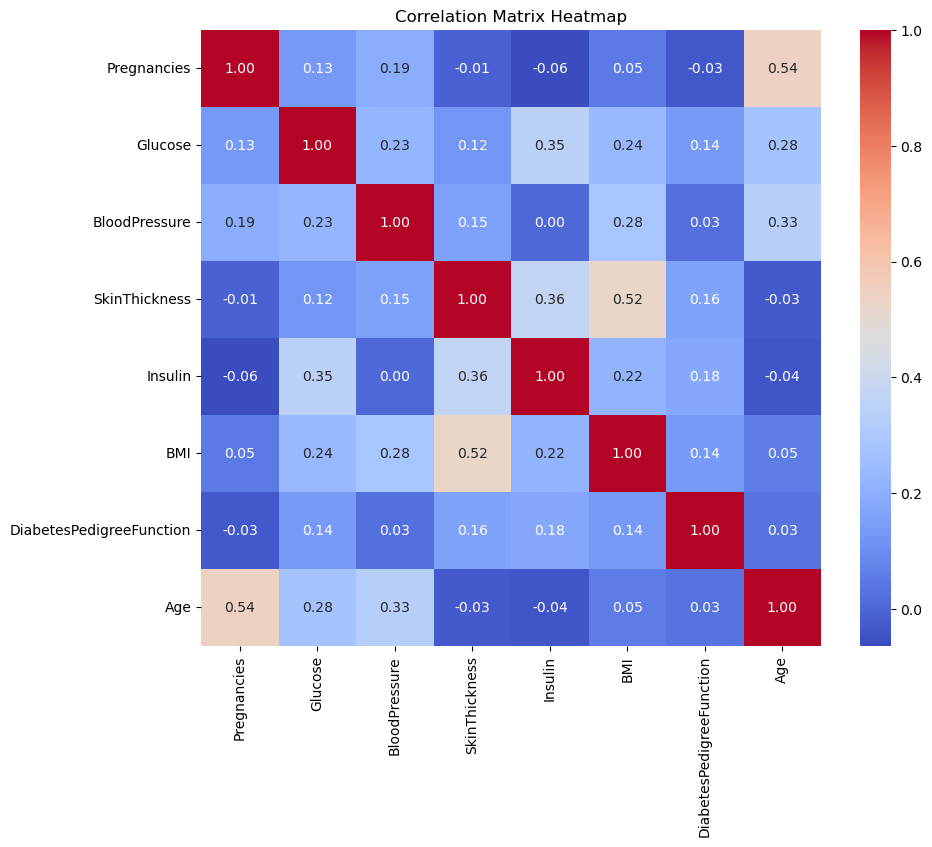

In [38]:
corr_matrix = calc_correlation_mat(df[x_columns])
visual_corr_heatmap(corr_matrix)

In [39]:
def p_biserial_corr(x_df, y_df):
    outcome_column = y_df.astype(int)
    correlation_with_outcome = {}

    for column in x_df.columns:
        correlation, _ = pointbiserialr(outcome_column, df[column])
        correlation_with_outcome[column] = correlation

    correlation_df = pd.DataFrame(list(correlation_with_outcome.items()), columns=['Feature', 'Point Biserial Correlation with Outcome'])
    return correlation_df

In [40]:
correlation_df = p_biserial_corr(df[x_columns], df["Outcome"])
sorted_corr_df = correlation_df.sort_values(by="Point Biserial Correlation with Outcome", ascending=False)
sorted_corr_df

,Feature,Point Biserial Correlation with Outcome
1,Glucose,0.489752
5,BMI,0.308509
7,Age,0.238356
0,Pregnancies,0.221898
6,DiabetesPedigreeFunction,0.174064
2,BloodPressure,0.153483
3,SkinThickness,0.146965
4,Insulin,0.142111


This is the tutorial for this statistic's **interpretation**:

1. [Point Serial Correlation Intepretation - Web reference](https://www.statisticshowto.com/point-biserial-correlation/)
2. [Point Serial Correlation Intepretation - Youtube Explained](https://youtu.be/-nmPEsYzaWo?si=XbMZ6kZax0CBjGgp)

# Model building:

## Data preparation:

### Data splitting:

In [41]:
x_df = df[x_columns]
y_df = df["Outcome"]

In [42]:
print("X dimension:")
x_df.head()

X dimension:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,15,33.6,0.627,50
1,1,85,66,29,15,26.6,0.351,31
2,8,183,64,20,15,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,60,35,168,40.0,2.200,33


In [43]:
print("Y dimension:")
y_df.head()

Y dimension:


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: object

### Ordinal data encoding:

In [44]:
def age_category(age):
    if age < 20:
        return 1
    elif 20 <= age < 30:
        return 2
    elif 30 <= age < 40:
        return 3
    elif 40 <= age < 50:
        return 4
    elif 50 <= age < 60:
        return 5
    elif 60 <= age < 70:
        return 6
    elif age >= 70:
        return 7

In [45]:
# Convert to group mapping
x_df['Age'] = x_df.loc[:, 'Age'].apply(age_category)

/tmp/ipykernel_806/3002334662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['Age'] = x_df.loc[:, 'Age'].apply(age_category)


### Data scaling use robust scaler:

### Model building:

In [48]:
def logistic_regression(x_df, y_df):
    x_df = sm.add_constant(x_df)
    model = sm.Logit(y_df, x_df)
    result = model.fit()
    return result

In [52]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Jan 2025   Pseudo R-squ.:                  0.2793
Time:                        01:33:14   Log-Likelihood:                -358.01
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.563e-55
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.8299      0.464    -10.415      0.000      -5.739      -3.921
Pregnancies                  0.5841      0.159      3.676      0.000       0.273       0.

From the original model, we should remove SkinThickness (0.920) due to its high P_value

In [53]:
x_df = x_df.drop("SkinThickness", axis="columns") 

### Create all possible combination, looping for the forward feature selection:

In [54]:
def generate_combination(x_df, interactive_var='Age'):
    columns = x_df.columns
    for col in columns:
        if col != interactive_var:
            x_df[f"{col}_{interactive_var}"]=x_df[col]*x_df[interactive_var]
        else:
            continue
    return x_df

In [55]:
scaled_x_df = generate_combination(x_df)

In [56]:
scaled_x_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_Age,Glucose_Age,BloodPressure_Age,SkinThickness_Age,Insulin_Age,BMI_Age,DiabetesPedigreeFunction_Age
0,1.6,1.751515,1.000000,2.00,0.861915,1.172043,1.665359,6,9.6,10.509091,6.000000,12.0,5.171492,7.032258,9.992157
1,0.6,0.224242,0.666667,1.50,0.861915,0.419355,0.943791,4,2.4,0.896970,2.666667,6.0,3.447661,1.677419,3.775163
2,2.0,2.600000,0.555556,0.75,0.861915,0.064516,1.783007,4,8.0,10.400000,2.222222,3.0,3.447661,0.258065,7.132026
3,0.6,0.321212,0.666667,1.00,1.565702,0.580645,0.462745,3,1.8,0.963636,2.000000,3.0,4.697105,1.741935,1.388235
4,0.4,1.484848,0.333333,2.00,2.224944,1.860215,5.777778,4,1.6,5.939394,1.333333,8.0,8.899777,7.440860,23.111111


***Interaction model building:***

In [63]:
def interaction_model_building(x_df, y_df, algorithm):
    x_dimension = []
    aic = []
    for col in x_df.columns:
        x_dimension.append(col)
        x_df_interact = x_df[x_dimension]
        model = algorithm(x_df_interact, y_df)
        if model.aic is not None:
            aic.append(model.aic)
        else:
            continue
    return pd.DataFrame({'Dimension': x_dimension, 'AIC': aic})

In [66]:
results = interaction_model_building(scaled_x_df, y_df, logistic_regression)

Optimization terminated successfully.
         Current function value: 0.622532
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.504657
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504454
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499378
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.498001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474720
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467617
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.466163
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462121
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.460121
  

In [67]:
results

,Dimension,AIC
0,Pregnancies,960.209884
1,Glucose,781.152842
2,BloodPressure,782.841125
3,SkinThickness,777.043976
4,Insulin,776.928924
5,BMI,743.169592
6,DiabetesPedigreeFunction,734.259318
7,Age,734.026875
8,Pregnancies_Age,729.817630
9,Glucose_Age,728.746389
